In [3]:
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 6)

In [4]:
# pandas-datareader package has a DataReader class for Yahoo finance, Google finance, etc

import pandas_datareader.data as web
# from datetime import datetime

df = pd.DataFrame()
symbols = 'GOOG IBM GE TSLA AAPL'.split()
for symbol in symbols:
    df_onesym = web.DataReader(symbol, 'yahoo', '2010-07-17', '2017-10-08')
    for name in df_onesym:
        newname = symbol.lower() + '_' + name.replace(' ', '_').lower()
        df[newname] = df_onesym[name]
df.to_csv('../shared-resources/time_series/time-series.csv')
df = df.fillna(method='ffill')
df = df.reindex()

In [5]:
type(df.index)  # dtype object

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
df.index.name = df.index.name.lower().replace(' ', '_')
df.index = pd.to_datetime(df.index)
df = df.fillna(method='ffill')
df = df.reindex()
df.to_csv('../shared-resources/time_series/time-series.csv')

In [7]:
df

,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,...,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,229.015472,233.307556,227.281754,231.583771,231.583771,9159800,128.669998,130.380005,128.369995,129.789993,...,20.920000,21.910000,21.910000,2486500,35.697144,35.697144,34.228573,35.082859,31.562510,256119500
2010-07-20,229.025406,239.934464,228.811798,239.238983,239.238983,8161600,122.970001,126.559998,122.930000,126.550003,...,20.049999,20.299999,20.299999,1825300,34.700001,36.128571,34.287144,35.984287,32.373478,268737700
2010-07-21,240.436188,241.280701,236.178879,237.207199,237.207199,6601800,126.440002,126.500000,124.620003,125.269997,...,19.500000,20.219999,20.219999,1252500,37.869999,37.878571,36.285713,36.320000,32.675503,296417800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-05,955.489990,970.909973,955.179993,969.960022,969.960022,1213800,146.679993,147.539993,146.479996,146.720001,...,351.350006,355.329987,355.329987,4171700,154.179993,155.440002,154.050003,155.389999,155.389999,21283800
2017-10-06,966.700012,979.460022,963.359985,978.890015,978.890015,1173900,146.639999,146.850006,146.320007,146.479996,...,352.250000,356.880005,356.880005,4297500,154.970001,155.490005,154.559998,155.300003,155.300003,17407600
2017-10-09,980.000000,985.424988,976.109985,977.000000,977.000000,891400,146.500000,147.789993,146.350006,147.389999,...,342.670013,342.940002,342.940002,7493700,155.809998,156.729996,155.490005,155.839996,155.839996,16262900


In [8]:
df.describe()

,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,...,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1.821000e+03,1821.000000,1821.000000,1821.000000,1821.000000,...,1821.000000,1821.000000,1821.000000,1.821000e+03,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1.821000e+03
mean,519.550338,523.482682,515.186408,519.477521,519.477521,3.558620e+06,170.710972,171.910154,169.622109,170.799835,...,146.279121,148.923515,148.923515,4.451256e+06,89.833707,90.590784,89.011243,89.822102,85.151329,8.117994e+07
std,207.677700,208.879226,206.270699,207.715681,207.715681,2.721914e+06,21.983505,22.069507,21.916405,21.974165,...,103.925762,105.491464,105.491464,4.255231e+06,31.444340,31.625268,31.239522,31.445372,32.501687,5.503797e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,525.749146,529.729614,521.120605,525.587646,525.587646,2.995200e+06,169.630005,171.039993,168.460007,170.050003,...,180.419998,183.559998,183.559998,3.472400e+06,88.571426,89.285713,87.894287,88.675713,80.358292,6.846000e+07
75%,702.179993,709.750000,694.049988,701.789978,701.789978,4.664900e+06,189.850006,190.889999,188.520004,189.830002,...,226.550003,230.029999,230.029999,5.977400e+06,112.580002,113.769997,111.550003,112.650002,109.149773,1.070678e+08
max,984.500000,988.250000,977.200012,983.679993,983.679993,2.984230e+07,215.380005,215.899994,214.300003,215.800003,...,379.350006,385.000000,385.000000,3.716390e+07,164.800003,164.940002,163.630005,164.050003,164.050003,4.702495e+08


In [9]:
df = pd.read_csv('../shared-resources/time_series/time-series.csv', index_col=0, header=0, parse_dates=True)
type(df.index)
df.index.isnull().sum()

0

In [13]:
df = pd.read_csv('../shared-resources/time_series/time-series.csv', index_col=0, header=0, parse_dates=True)
btc = pd.read_csv('../shared-resources/time_series/coindesk-bpi-USD-ohlc_data-2010-06-30_2017-10-08.csv',
                  index_col=0, header=0, parse_dates=True)
btc.head()
#btc.index = btc.index.astype(df.index.dtype)
# for col in btc.columns:
#     df[col.replace(' ', '_').lower()] = btc[col]
# df.to_csv('../shared-resources/time_series/time-series2.csv')
# df.head()

,Open,High,Low,Close
Date,,,,
2010-07-18,0.05,0.09,0.06,0.09
2010-07-19,0.09,0.09,0.08,0.08
2010-07-20,0.08,0.08,0.07,0.07
2010-07-21,0.07,0.08,0.07,0.08
2010-07-22,0.08,0.08,0.05,0.05


In [19]:
# transform dataframe
btc['rise'] = btc.Close.diff()
btc_cleaned = btc.iloc[1:]
btc_cleaned.head()

,Open,High,Low,Close,rise
Date,,,,,
2010-07-19,0.09,0.09,0.08,0.08,-0.01
2010-07-20,0.08,0.08,0.07,0.07,-0.01
2010-07-21,0.07,0.08,0.07,0.08,0.01
2010-07-22,0.08,0.08,0.05,0.05,-0.03
2010-07-23,0.05,0.07,0.05,0.06,0.01


In [83]:
#do forestregression and things
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=10, max_depth=2, n_jobs=-1)

X = btc_cleaned.Close[:-1, None]
y = btc_cleaned.rise[1:]
# try to compare to previous values and compare rise and drop with previous day
reg.fit(X,y)
reg.score(X,y)
btc_cleaned['rise_pred'] = reg.predict(btc_cleaned.rise)


TypeError: predict() takes 2 positional arguments but 3 were given

In [82]:
import numpy as np
import matplotlib
import seaborn as sns

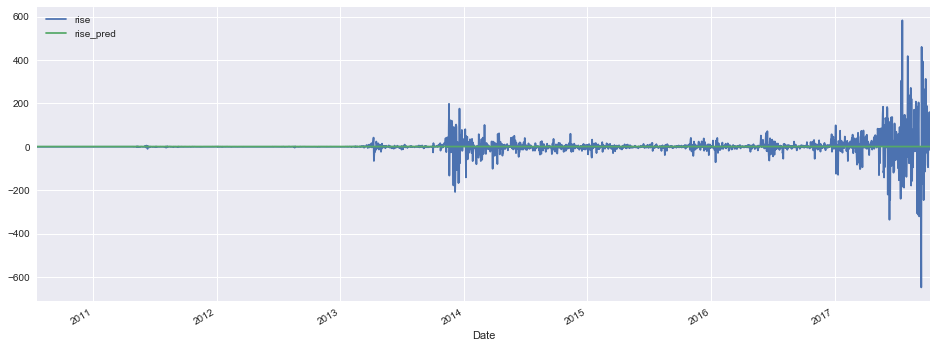

In [78]:
ax = btc_cleaned[["rise", "rise_pred"]].plot(figsize=(16, 6))
plt.show()

## Your Turn

1. load the time series of bitcoin prices from the ../shared-resources/ directory
2. make sure there aren't any "Unknown" columns of integers in your
2. make sure the index has an appropriate type for a *time series*
3. add a column to this time-series.csv file for bitcoin
3. save it to 'time-series-with-bitcoin.csv'

## BONUS

1. find a stock/commodity/index you're interested in: '../shared-resources/time_series/secwiki_tickers.csv'
2. use yahoo or google finance to download it's data
3. Add columns for it to your time series DataFrame
4. save it to a csv for use later in class